In [2]:
import numpy as np
import pandas as pd

import os
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import glob
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from keras.utils.vis_utils import plot_model
from PIL import Image

In [3]:
train_directory="..///data//archive//chest_xray//train//"
val_directory="..//data//archive//chest_xray//val//"
test_directory="..//data//archive//chest_xray//test//"
input_path="..//data//archive//chest_xray//"

In [4]:
data_dir = train_directory
class_names=os.listdir(train_directory)
# class_names.pop()
print(class_names)

['NORMAL', 'PNEUMONIA']


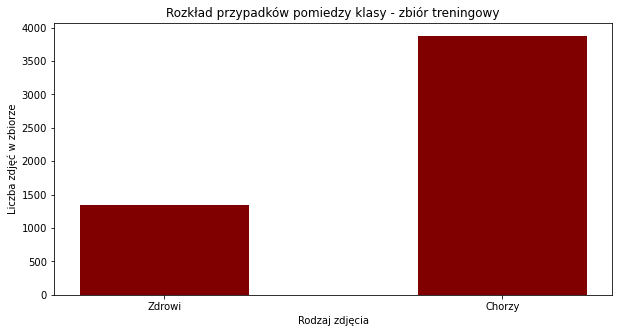

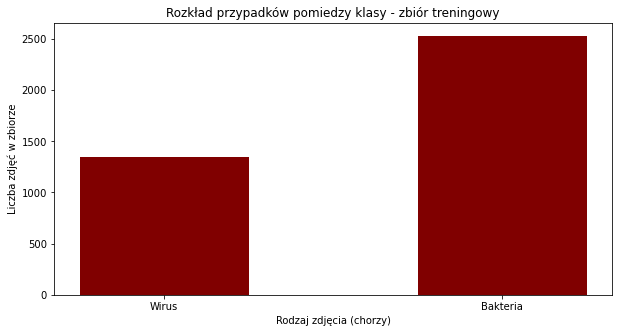

Set type: train, normal images: 1341, pneumonia images: 3875
1341 1345 2530


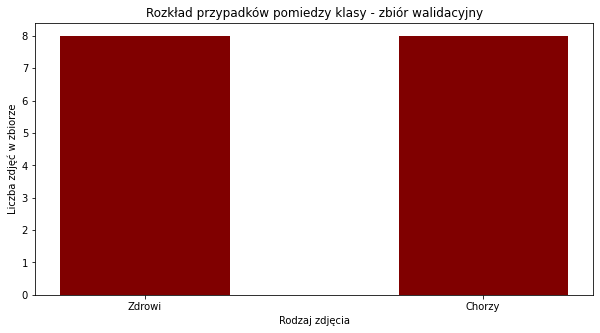

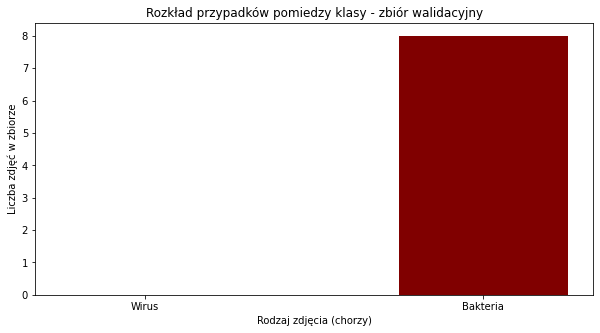

Set type: val, normal images: 8, pneumonia images: 8
8 0 8


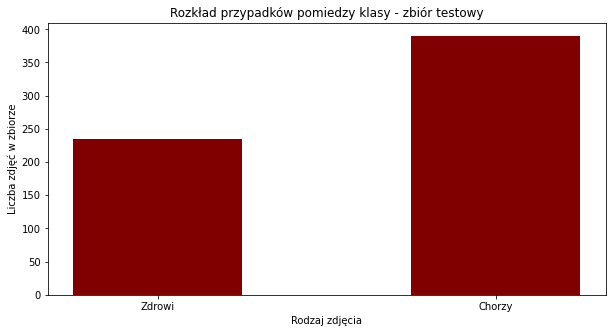

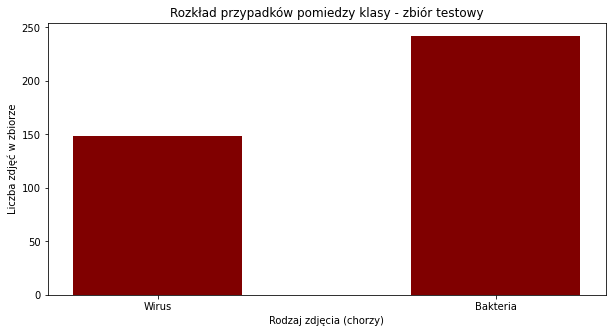

Set type: test, normal images: 234, pneumonia images: 390
234 148 242


In [5]:
types = {'train': "treningowy", 'val': "walidacyjny", 'test': "testowy"}

for set_type in ['train', 'val', 'test']:
    n_normal = len(os.listdir(input_path + set_type + '//NORMAL'))
    infec = os.listdir(input_path + set_type + '//PNEUMONIA')
    n1, n2 = 0, 0
    for inf in infec:
        if "vir" in inf: n1 += 1
        else: n2 += 1
    n_infect = len(os.listdir(input_path + set_type + '//PNEUMONIA'))
    courses = ["Zdrowi", "Chorzy"]
    courses2 = ["Wirus", "Bakteria"]
    values = [n_normal, n_infect]
    values2 = [n1, n2]
    
    fig = plt.figure(figsize = (10, 5))
    plt.bar(courses, values, color ='maroon', width = 0.5)
    plt.xlabel("Rodzaj zdjęcia")
    plt.ylabel("Liczba zdjęć w zbiorze")
    plt.title(f"Rozkład przypadków pomiedzy klasy - zbiór {types[set_type]}")
    plt.show()
    
    fig = plt.figure(figsize = (10, 5))
    plt.bar(courses2, values2, color ='maroon', width = 0.5)
    plt.xlabel("Rodzaj zdjęcia (chorzy)")
    plt.ylabel("Liczba zdjęć w zbiorze")
    plt.title(f"Rozkład przypadków pomiedzy klasy - zbiór {types[set_type]}")
    plt.show()
    print(f"Set type: {set_type}, normal images: {n_normal}, pneumonia images: {n_infect}")
    
    print(n_normal, n1, n2)

In [6]:
def get_class_name(target_class):
    if target_class[0] == "P":
        return "Chory"
    return "Zdrowy"

def view_random_image(target_directory, target_class):
    target_folder = target_directory + target_class
    random_image = random.sample(os.listdir(target_folder), 1)
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img / np.max(img))
    plt.title(get_class_name(target_class))
    plt.axis("off");
    return img

In [7]:
def view_each_type(target_directory, target_class, type_im):
    target_folder = target_directory + target_class
    while True:
        random_image = random.sample(os.listdir(target_folder), 1)
        if (type_im in random_image[0]):
            img = mpimg.imread(target_folder + "/" + random_image[0])
            plt.imshow(img / np.max(img))
            plt.title(get_class_name(target_class) + f", {type_im}")
            plt.axis("off")
            return img

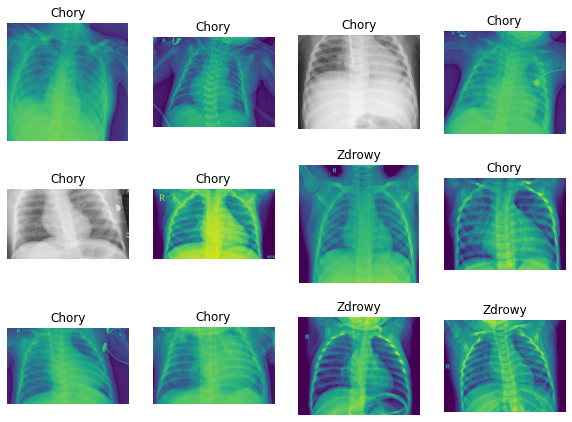

In [8]:
plt.figure(figsize=(10,10))
for i in range(12):
    plt.subplot(4,4,i+1)
    r=random.randint(0,1)
    img = view_random_image(data_dir, class_names[r]) 

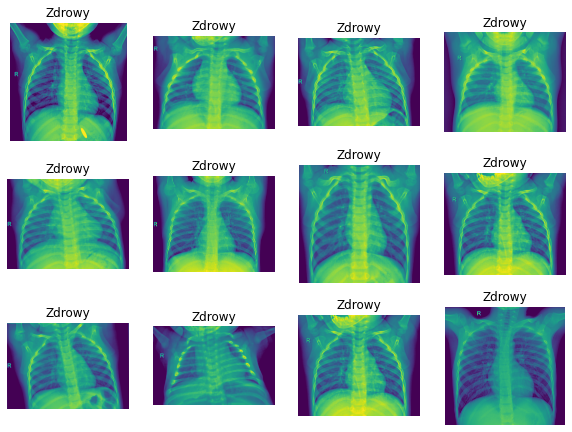

In [9]:
plt.figure(figsize=(10,10))
for i in range(12):
    plt.subplot(4,4,i+1)
    r=0
    img = view_random_image(data_dir, class_names[r]) 

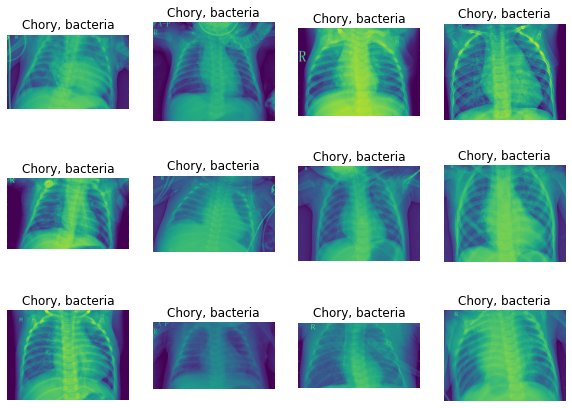

In [10]:
plt.figure(figsize=(10,10))
for i in range(12):
    plt.subplot(4,4,i+1)
    r=1
    img = view_each_type(data_dir, class_names[r], "bacteria") 

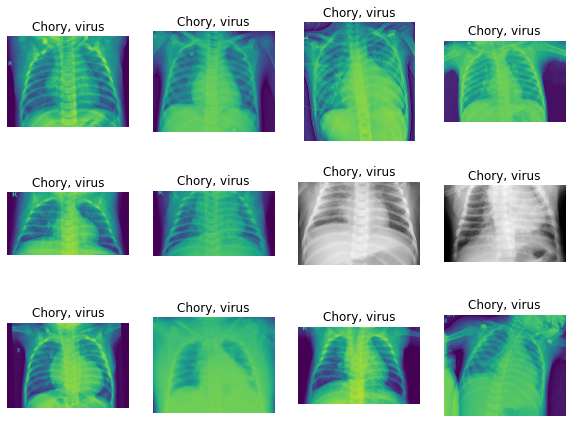

In [11]:
plt.figure(figsize=(10,10))
for i in range(12):
    plt.subplot(4,4,i+1)
    r=1
    img = view_each_type(data_dir, class_names[r], "virus") 

In [12]:
def choose_random_image(target_directory, target_class):
    target_folder = target_directory + target_class
    random_image = random.sample(os.listdir(target_folder), 1)
    img = mpimg.imread(target_folder + "/" + random_image[0])
    return img

def choose_image(target_directory, target_class, i):
    target_folder = target_directory + target_class
    random_image = os.listdir(target_folder)[i]
    typ = 0
    if 'v' in random_image:
        typ = 1
    elif 'b' in random_image:
        typ = 2
    img = mpimg.imread(target_folder + "/" + random_image)
    return img, typ

In [156]:
from lib2to3.pytree import convert
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

width = 541
heigth = 555

def drawImage(picture, shape = None, rgb = False, scale = 255) :
    if rgb : image = Image.fromarray(scale * np.array(picture).reshape((shape[0], shape[1], 3))) 
    else : image = Image.fromarray(scale * np.array(picture).reshape((shape[0], shape[1]))) 
    image.show()
    # print('Do continue: ')
    # while input() not in ['c', 'C', 'k', 'K', 't', 'T', 'y', 'Y'] :
    #     print('Do continue: ')
    return image

def grayscaleKernel(shape, dtype = np.float64) :
    kernel = np.array([0.33, 0.33, 0.33]).reshape(shape)
    return kernel

def toShape(picture) :
    n = len(picture.shape)
    width, heigth = picture.shape[0], picture.shape[1]
    input_shape = (1, width, heigth, 1)
    if n != 2: 
        picture = picture[:,:,0]
    picture = np.array(picture.reshape(input_shape), dtype = np.float64)
    converted = picture
    return converted

def pool(picture) :
    picture = tf.keras.layers.AveragePooling2D(pool_size=(4, 4), strides=(4, 4), padding='valid')(picture)
    return picture

def normalizedWindowKernel(shape, dtype = np.float64) :
    n = (shape[0] - 1) / 2.0
    kernel = np.ndarray((shape[0], shape[0]))
    s = 0
    for i in range(shape[0]) :
        for j in range(shape[1]) :
            dis = np.sqrt(np.power((i - n), 2.) + np.power((j - n), 2.))
            kernel[i][j] = np.exp(-np.power(dis, 2.) / (2 * np.power(n, 2.)))
            s += kernel[i][j]
    kernel = kernel / s
    return kernel.reshape(shape)

def gaussianBlur(picture) :
    input_shape = np.shape(picture)
    converted = tf.keras.layers.Conv2D(filters = 1, strides = 1, kernel_size = (3, 3), padding = 'same', kernel_initializer = normalizedWindowKernel, input_shape=input_shape[1:])(picture)
    return converted

def sobelFilterKernel1(shape, dtype = np.float64) :
    return np.array([[1, 2, 1], 
                     [0, 0, 0],
                     [-1, -2, -1]]).reshape(shape)

def sobelFilterKernel2(shape, dtype = np.float64) :
    return sobelFilterKernel1(shape, dtype = dtype).transpose().reshape(shape)

def sobelFilter(picture) :
    input_shape = np.shape(picture)
    channel1 = tf.keras.layers.Conv2D(filters = 1, strides = 1, kernel_size = (3, 3), padding = 'same', kernel_initializer = sobelFilterKernel1, input_shape=input_shape[1:])(picture)
    channel2 = tf.keras.layers.Conv2D(filters = 1, strides = 1, kernel_size = (3, 3), padding = 'same', kernel_initializer = sobelFilterKernel2, input_shape=input_shape[1:])(picture)
    return channel1, channel2

f = lambda x : np.power(x, 2)
g = lambda x : np.sqrt(x)

def joinChannels(channel1, channel2) :
    return g(f(channel1) + f(channel2))

def filterReLU(picture, level) :
    shape = picture.shape
    length = np.prod(shape)
    picture = picture.reshape((length))
    picture = np.where(picture - level > 0, picture, 0)
    maxB = max(1, np.max(picture))
    return picture.reshape(shape) / maxB

def joinPictures(pictures, picture) :
    sumPicture = np.zeros((width, heigth))
    for pic in pictures : 
        sumPicture += pic
    drawImage(sumPicture, shape = (np.shape(sumPicture)[0], np.shape(sumPicture)[1]))
    result = np.zeros((width, heigth, 3))
    for i in range(width) : 
        for j in range(heigth) :
            result[i][j][0] = max(0, 255 * picture[i][j][0] - sumPicture[i][j])
            result[i][j][2] = max(0, min(255, 255 * picture[i][j][2] + 2 * sumPicture[i][j]))
            result[i][j][1] = max(0, 255 * picture[i][j][1] - sumPicture[i][j])
    result.astype(np.int8)
    print(result)
    return result

def draw_with_sobel_kernel(data_dir, class_name, i):
    picture, _ = choose_image(data_dir, class_name, i)
    memPicture = np.array(picture)
    memPicture1 = np.array(picture)
    picture = toShape(picture)
    picture = pool(picture)
    picture = gaussianBlur(picture)
    channel1, channel2 = sobelFilter(picture)
    picture = joinChannels(channel1, channel2)
    picture = filterReLU(picture, 0.9)
#     image = Image.fromarray(picture[0].astype(np.int8), mode = 'RGB').show()
    plt.imshow(picture[0].reshape((picture[0].shape[0], picture[0].shape[1])))
    plt.show()
    
def detect_edges(picture, filter_level):
    memPicture = np.array(picture)
    memPicture1 = np.array(picture)
    picture = toShape(picture)
    picture = pool(picture)
    picture = gaussianBlur(picture)
    channel1, channel2 = sobelFilter(picture)
    picture = joinChannels(channel1, channel2)
    picture = filterReLU(picture, filter_level)
    return picture
    
def draw_images_with_sobel_kernel(data_dir, class_name):
    for i in range(8):
        draw_with_sobel_kernel(data_dir, class_name, i)

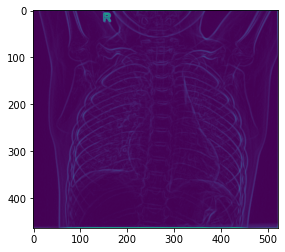

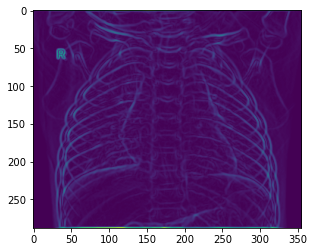

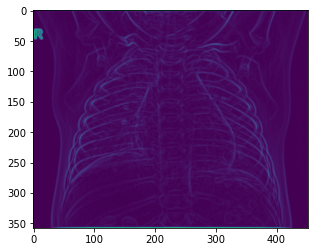

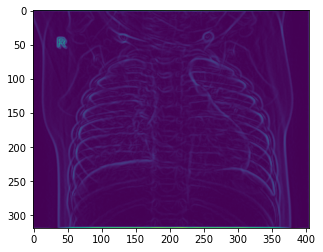

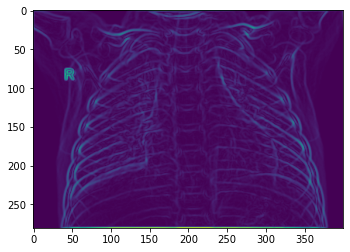

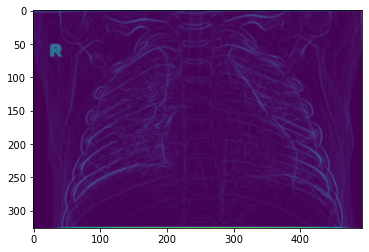

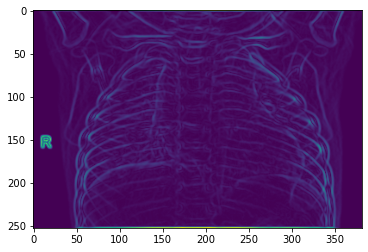

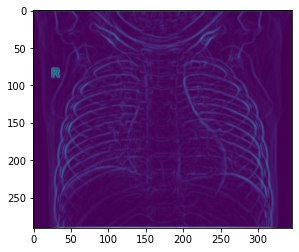

In [14]:
class_names=os.listdir(train_directory)
draw_images_with_sobel_kernel(train_directory, class_names[0])

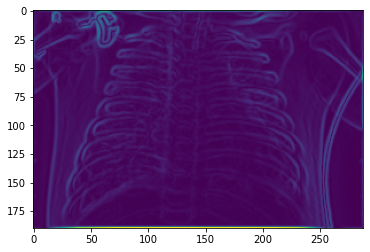

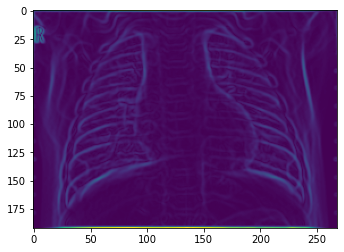

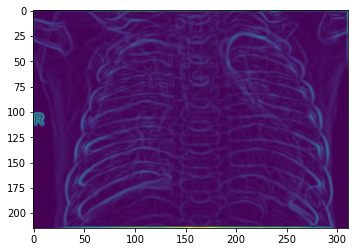

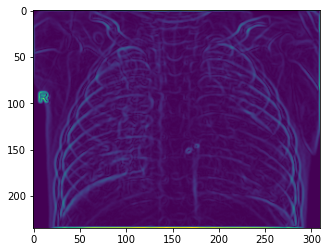

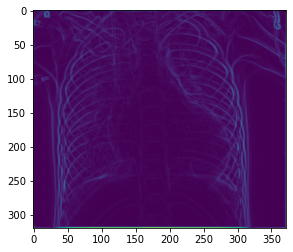

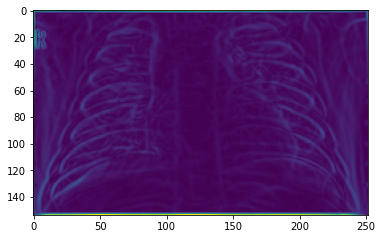

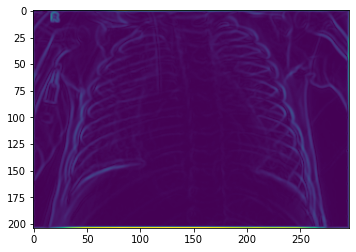

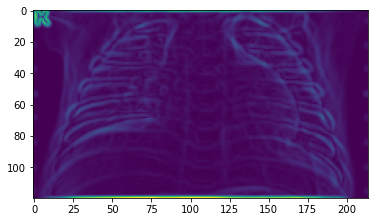

In [15]:
draw_images_with_sobel_kernel(train_directory, class_names[1])

# SVM

In [63]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [149]:
filter_level = 0.9

In [169]:
def create_one_image(data_dir, class_name, i, size = 32, do_sobel = False):
    picture, typ = choose_image(data_dir, class_name, i)
    if do_sobel: picture = detect_edges(picture, filter_level)[0,:,:,0]
    image = tf.constant(picture)
    if len(picture.shape) == 2: image = image[tf.newaxis, ..., tf.newaxis]
    else : image = image[tf.newaxis, ...]
    picture = tf.image.resize(image, (size, size))[0, ..., 0].numpy()
    picture = np.reshape(picture, size * size)
    return picture, typ
    
def create_dataset(data_dir, set_type = "train", do_differ = True, size = 32, do_sobel = False):
    pictures = []
    labels = []
#     print(data_dir)
    n = len(os.listdir(data_dir + 'NORMAL'))
    for i in range(n):
#         if i % 250 == 125: print(i * 100 / n, "%")
        picture, typ = create_one_image(data_dir, class_names[0], i, size, do_sobel)
        pictures.append(picture)
        if not do_differ: typ = (typ + 1) // 2
        labels.append(typ)
        
    n = len(os.listdir(data_dir + 'PNEUMONIA'))
    for i in range(n):
#         if i % 250 == 125: print(i * 100 / n, "%")
        picture, typ = create_one_image(data_dir, class_names[1], i, size, do_sobel)
        pictures.append(picture)
        if not do_differ: typ = (typ + 1) // 2
        labels.append(typ)
                
    pictures = np.array(pictures)
    labels = np.array(labels)
    
#     print(pictures.shape)
#     print(labels.shape)
#     print(labels[0:10])
    
    return pictures, labels

In [170]:
def get_weights(y_test):
    y = np.zeros(y_test.shape[0])
    n1 = np.sum(np.where(y_test == 0, 1, 0))
    n2 = np.sum(np.where(y_test == 1, 1, 0))
    n3 = np.sum(np.where(y_test == 2, 1, 0))
    m = float(y_test.max())
    n = n1 + n2 + n3
    w = [0, 0, 0]
    w[0], w[1], w[2] = n / (m * n1 + 1), n / (m * n2 + 1), n / (m * n3 + 1)
    for i in range(y.shape[0]):
        y[i] = w[y_test[i]]
    return y

In [182]:
def confusion_matrix_function(model, X_test, y_test):
    
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

    plt.xlabel('Predictions: 0 - Zdrowy, 1 - Wirus, 2 - Bakteria', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()

## 3 class classification

In [129]:
X_train_64, y_train_64 = create_dataset(train_directory, size = 64)
X_val_64, y_val_64 = create_dataset(val_directory, size = 64)
X_test_64, y_test_64 = create_dataset(test_directory, size = 64)

In [130]:
svc = SVC()
svc.fit(X_train_64, y_train_64, sample_weight=get_weights(y_train_64))
svc.score(X_test_64, y_test_64)

0.7163461538461539

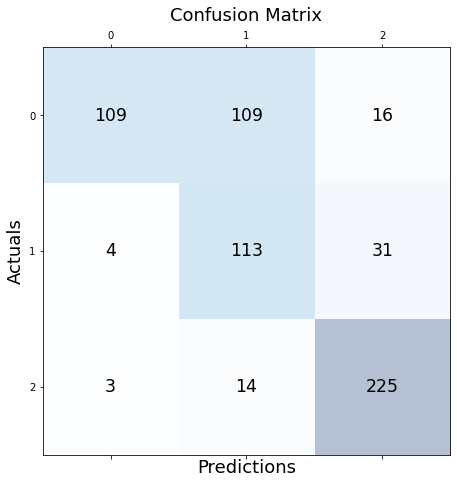

In [131]:
confusion_matrix_function(svc, X_test_64, y_test_64)

In [134]:
X_train_32, y_train_32 = create_dataset(train_directory, size = 32)
X_val_32, y_val_32 = create_dataset(val_directory, size = 32)
X_test_32, y_test_32 = create_dataset(test_directory, size = 32)

In [135]:
svc1 = SVC()
svc1.fit(X_train_32, y_train_32, sample_weight=get_weights(y_train_32))
svc1.score(X_test_32, y_test_32)

0.7083333333333334

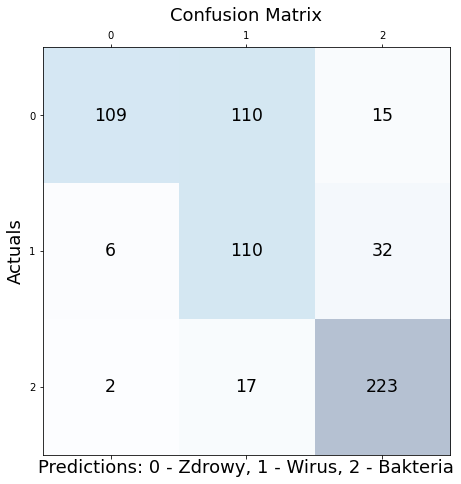

In [136]:
confusion_matrix_function(svc1, X_test_32, y_test_32)

In [137]:
svc2 = SVC()
svc2.fit(X_train_32[1000:2000], y_train_32[1000:2000], sample_weight=get_weights(y_train_32[1000:2000]))
svc2.score(X_test_32, y_test_32)

0.7003205128205128

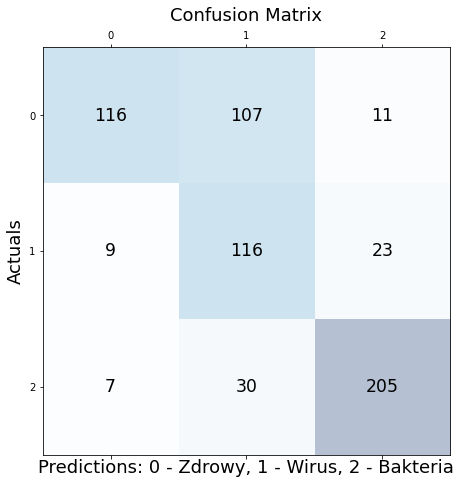

In [138]:
confusion_matrix_function(svc2, X_test_32, y_test_32)

## 2 class classification

In [139]:
X_train_32, y_train_32 = create_dataset(train_directory, do_differ = False, size = 32)
X_val_32, y_val_32 = create_dataset(val_directory, do_differ = False, size = 32)
X_test_32, y_test_32 = create_dataset(test_directory, do_differ = False, size = 32)

In [140]:
svc3 = SVC()
svc3.fit(X_train_32, y_train_32, sample_weight=get_weights(y_train_32))
svc3.score(X_test_32, y_test_32)

0.7884615384615384

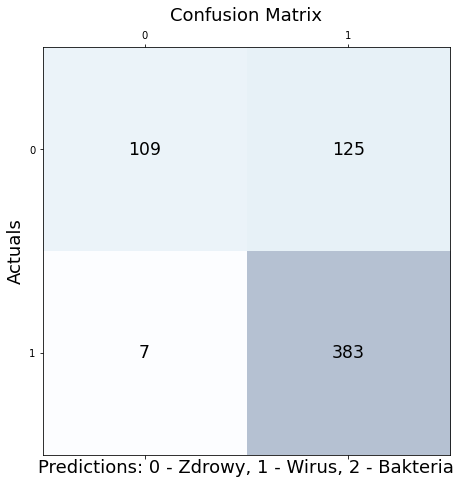

In [141]:
confusion_matrix_function(svc3, X_test_32, y_test_32)

In [142]:
X_train_64, y_train_64 = create_dataset(train_directory, do_differ = False, size = 64)
X_val_64, y_val_64 = create_dataset(val_directory, do_differ = False, size = 64)
X_test_64, y_test_64 = create_dataset(test_directory, do_differ = False, size = 64)

In [143]:
svc4 = SVC()
svc4.fit(X_train_64, y_train_64, sample_weight=get_weights(y_train_64))
svc4.score(X_test_64, y_test_64)

0.782051282051282

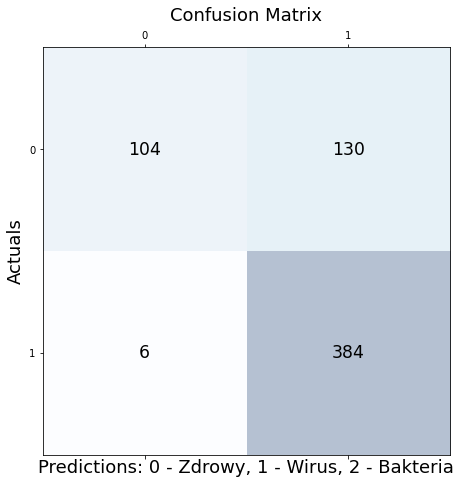

In [144]:
confusion_matrix_function(svc4, X_test_64, y_test_64)

In [145]:
svc5 = SVC()
svc5.fit(X_train_32[1000:2000], y_train_32[1000:2000], sample_weight=get_weights(y_train_32[1000:2000]))
svc5.score(X_test_32, y_test_32)

0.780448717948718

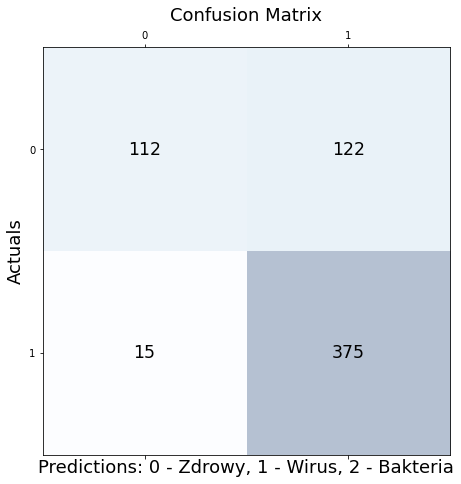

In [146]:
confusion_matrix_function(svc5, X_test_32, y_test_32)

## Sobel Kernel - 2 classes

In [172]:
X_train_64_sobel, y_train_64_sobel = create_dataset(train_directory, do_differ = False, size = 64, do_sobel = True)
X_val_64_sobel, y_val_64_sobel = create_dataset(val_directory, do_differ = False, size = 64, do_sobel = True)
X_test_64_sobel, y_test_64_sobel = create_dataset(test_directory, do_differ = False, size = 64, do_sobel = True)

In [173]:
svc6 = SVC()
svc6.fit(X_train_64_sobel, y_train_64_sobel, sample_weight=get_weights(y_train_64_sobel))
svc6.score(X_test_64_sobel, y_test_64_sobel)

0.8333333333333334

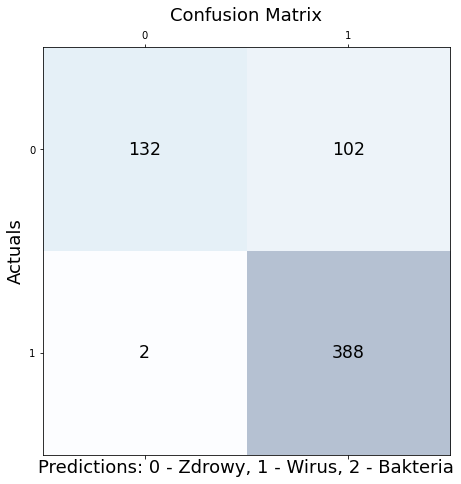

In [174]:
confusion_matrix_function(svc6, X_test_64_sobel, y_test_64_sobel)

## Sobel Kernel - 3 classes

In [175]:
X_train_64_sobel, y_train_64_sobel = create_dataset(train_directory, size = 64, do_sobel = True)
X_val_64_sobel, y_val_64_sobel = create_dataset(val_directory, size = 64, do_sobel = True)
X_test_64_sobel, y_test_64_sobel = create_dataset(test_directory, size = 64, do_sobel = True)

In [176]:
svc7 = SVC()
svc7.fit(X_train_64_sobel, y_train_64_sobel, sample_weight=get_weights(y_train_64_sobel))
svc7.score(X_test_64_sobel, y_test_64_sobel)

0.7900641025641025

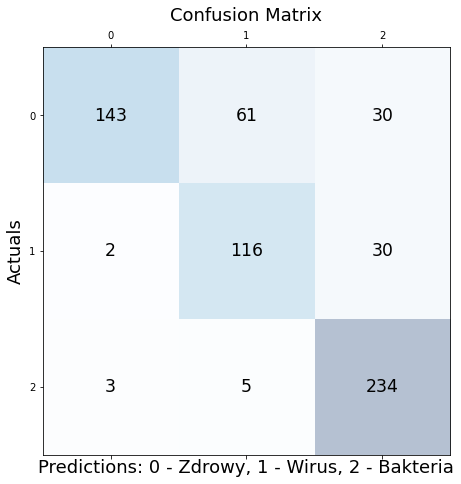

In [183]:
confusion_matrix_function(svc7, X_test_64_sobel, y_test_64_sobel)